## Compare with conventional path-finding algorithm

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import math
import time
import pickle

from itertools import permutations
from functions import *

np.random.seed(1234)

In [2]:
nc=4
nr=4

x_d = 1
y_d = 1

X = np.random.randint(low=0, high=10, size=nc*nr).reshape(nr,nc)
#X = np.array([10,9,3,0,3,10,10,7,0,1,1,10]).reshape(nr,nc)
X

X[0][0] = 10
X[nr-1][nc-1] = 10
#X[nr-1][0] = 9
X[0][nc-1] = 9
X

array([[10,  6,  5,  9],
       [ 8,  9,  1,  7],
       [ 9,  6,  8,  0],
       [ 5,  0,  9, 10]])

In [3]:
nc=4
nr=4

x_d = 1
y_d = 1

#X = np.random.randint(low=0, high=10, size=nc*nr).reshape(nr,nc)
X = np.array([10,6,5,9,8,1,1,7,9,6,2,4,5,0,9,10]).reshape(nr,nc)
X

array([[10,  6,  5,  9],
       [ 8,  1,  1,  7],
       [ 9,  6,  2,  4],
       [ 5,  0,  9, 10]])

In [4]:
unique_routes = get_unique_routes(X)
unique_routes

array([[-1, -1, -1,  1,  1,  1],
       [-1, -1,  1, -1,  1,  1],
       [-1, -1,  1,  1, -1,  1],
       [-1, -1,  1,  1,  1, -1],
       [-1,  1, -1, -1,  1,  1],
       [-1,  1, -1,  1, -1,  1],
       [-1,  1, -1,  1,  1, -1],
       [-1,  1,  1, -1, -1,  1],
       [-1,  1,  1, -1,  1, -1],
       [-1,  1,  1,  1, -1, -1],
       [ 1, -1, -1, -1,  1,  1],
       [ 1, -1, -1,  1, -1,  1],
       [ 1, -1, -1,  1,  1, -1],
       [ 1, -1,  1, -1, -1,  1],
       [ 1, -1,  1, -1,  1, -1],
       [ 1, -1,  1,  1, -1, -1],
       [ 1,  1, -1, -1, -1,  1],
       [ 1,  1, -1, -1,  1, -1],
       [ 1,  1, -1,  1, -1, -1],
       [ 1,  1,  1, -1, -1, -1]])

max-weight route: 2
best route: 19
time (s): 0.12162490887567401


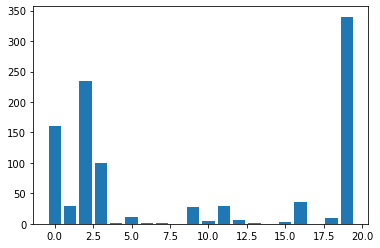

In [5]:
start_time = time.perf_counter()

if x_d == -1:
    X = np.fliplr(X)
if y_d == -1:
    X = np.flipud(X)

#unique_routes = get_unique_routes(X)
unique_paths = get_path_from_routes(X, unique_routes)
#path_info_list = get_path_info_from_matrix(X)
boot_sample = bayesian_bootstrap(X, get_max_path_idx, 1000, unique_paths)

boot_sample_out = []
for idx in range(0,len(unique_routes)):
    boot_sample_out.append([idx, sum(np.asarray(boot_sample)==idx)])
boot_sample_out = np.vstack(boot_sample_out)
#boot_sample_list.append(boot_sample_out)

max_route = unique_paths[get_max_path_idx(X, unique_paths)[0]]
#best_route = path_info_list[1][np.argmax(boot_sample_out[:,1])]
best_route = unique_paths[np.argmax(boot_sample_out[:,1])]
#best_route_list.append(best_route)

print('max-weight route: {}'.format(get_max_path_idx(X, unique_paths)[0]))
print('best route: {}'.format(np.argmax(boot_sample_out[:,1])))
print('time (s): {}'.format(time.perf_counter()-start_time))

plt.bar(boot_sample_out[:,0], boot_sample_out[:,1])
plt.show()

In [6]:
boot_sample_out_selected = boot_sample_out[np.where(boot_sample_out[:,1]!=0)[0]]
boot_sample_out_selected

array([[  0, 160],
       [  1,  29],
       [  2, 235],
       [  3, 100],
       [  4,   1],
       [  5,  11],
       [  6,   2],
       [  7,   2],
       [  9,  28],
       [ 10,   4],
       [ 11,  30],
       [ 12,   7],
       [ 13,   2],
       [ 15,   3],
       [ 16,  36],
       [ 18,  10],
       [ 19, 340]])

In [7]:
out_name = 'out_exp/grid_example'
with open(out_name, 'wb') as f:
    pickle.dump(boot_sample_out_selected, f)

In [8]:
boot_sample_out_all = []
for i in range(len(unique_routes)):
    try:
        #idx = path_idx_key[str(i)]
        boot_sample_out_all.append(np.array([i, boot_sample_out_selected[boot_sample_out_selected[:,0]==i][0][1]]))
    except:
        boot_sample_out_all.append(np.array([i,0]))
        
boot_sample_out_all = np.vstack(boot_sample_out_all)

out_name = 'out_exp/grid_example_normal'
with open(out_name, 'wb') as f:
    pickle.dump(boot_sample_out_all, f)

In [9]:
best_route

{'path_id': 19,
 'path': [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (3, 3)]}

In [10]:
out_name = 'out_exp/grid_best_route'
with open(out_name, 'wb') as f:
    pickle.dump([best_route], f)

In [11]:
max_route

{'path_id': 2,
 'path': [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (3, 2), (3, 3)]}

In [12]:
out_name = 'out_exp/grid_max_route'
with open(out_name, 'wb') as f:
    pickle.dump([max_route], f)

In [13]:
available_route_list = []
for idx in np.where(boot_sample_out[:,1]!=0)[0]:
    available_route_list.append(unique_paths[idx])

In [14]:
out_name = 'out_exp/available_route_list_normal'
with open(out_name, 'wb') as f:
    pickle.dump(available_route_list, f)

In [15]:
exp_grid_list = [X]

In [16]:
out_name = 'out_exp/exp_grid_list'
with open(out_name, 'wb') as f:
    pickle.dump(exp_grid_list, f)